In [6]:
import matplotlib.pyplot as plt
import random
import numpy as np
import copy
import networkx as nx
import scipy
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

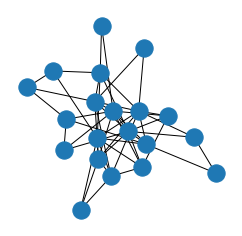

In [7]:
# Generate Erdos Renyi graphs based on probability

graph = nx.erdos_renyi_graph(n=20, p=0.3)
#new figure to plot network graphs
fig_graph = plt.figure(figsize = (9, 9) )
fig_graph.add_subplot(2,2,1)
nx.draw(graph)
adj= nx.to_numpy_array(graph)

In [15]:
def motion(q_0, t_span, omegas, K, N, adj):
    s1 = odeint(func= kuramoto, y0 = q_0, t=t_span, args=(omegas, K, N, adj) )
    q = s1[:,::]
    dq = np.zeros(np.shape(q))
    for i in range(len(t_span)):
        dq[i] = kuramoto(q[i], t_span[i], omegas, K, N, adj)
    return q, dq


def kuramoto(_q, t,  _omegas, _K, _N, adj):
    _dq = np.zeros(np.shape(_q))
    for i in range(_N):
        for j in range(_N):
            _dq[i] += adj[i][j] * (_K/ ( np.sum(adj[i]) + 1) ) * np.sin(_q[j] - _q[i])
    _dq += _omegas
    return _dq

def kuramoto_1(_q,_t,  _omegas, _K, _N, adj):
    _dq = np.zeros(np.shape(_q))
    for i in range(_N):
        for j in range(_N):
            _dq[i] += adj[i][j] * np.sin(_q[j] - _q[i])
        _dq[i] /=  ( np.sum(adj[i]) + 1 )
    _dq *= K
    _dq += _omegas
    return _dq

def r_parameter(_q, _N):
    _r = np.abs( np.sum( np.exp(np.cdouble(_q)*1j) / _N ))
    return _r

def r_mean_parameter(_q_0, _t_span, _omegas, _K , _N, _adj):
    _r_mean = 0
    _q, _dq = motion( _q_0, _t_span, _omegas, _K, _N, _adj)
    for t_count in range(len(_t_span)):
        _r_mean += r_parameter(_q[t_count,:], _N)
    #media
    _r_mean *= 1./len(t_span)
    return _r_mean


In [16]:
random.seed(0)

# parameters model 
N = 20
K = 50000
omegas = np.random.rand(N)

# initial conditions
q_0 = np.random.rand(N)*2*np.pi

# simulation 
dt = 0.0001
t_max = 2
t_span = np.arange(0, t_max, dt)


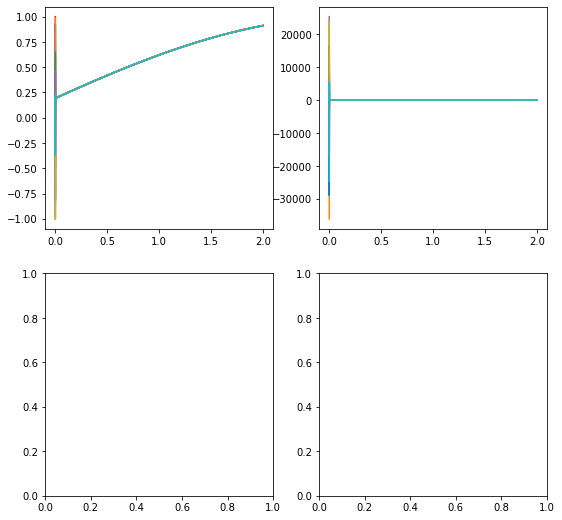

In [13]:
# for one simulation
# integrating the system
sol = odeint(func= kuramoto_1, y0 = q_0, t=t_span, args=(omegas, K, N, adj) )
q = sol[:,::]
dq = np.zeros(np.shape(q))
for i in range(len(t_span)):
    dq[i] = kuramoto_1(q[i], t_span[i], omegas, K, N, adj)
    
# new figure to plot network graphs
fig_graph = plt.figure(figsize = (9, 9) )
axs_graph = [fig_graph.add_subplot(2,2,1), fig_graph.add_subplot(2,2,2), fig_graph.add_subplot(2, 2, 3), fig_graph.add_subplot(2, 2, 4)]

# plotting
axs_graph[0].plot(t_span, np.sin(q))
axs_graph[1].plot(t_span, dq)
print()

In [18]:
K_start = 0
K_end = 20 
K_step = 0.5
K_cycle = np.arange(K_start, K_end, K_step)
r_K_mean = []

for K in K_cycle:
    r = r_mean_parameter(q_0, t_span, omegas, K, N, adj)
    r_K_mean.append(r)

[Text(0.5, 1.0, 'Erdos-Renyi: p = 0.3, N = 20')]

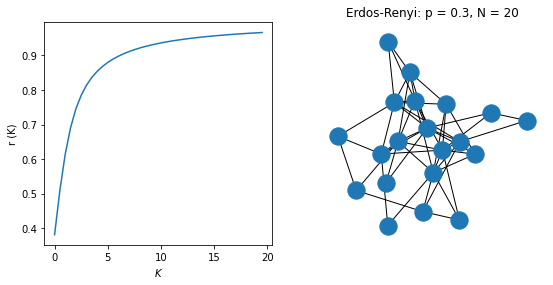

In [19]:
#new figure to plot network graphs
fig_r = plt.figure(figsize = (9, 9) )
axs_r = fig_r.add_subplot(2,2,1)
axs_r.set(xlabel="$K$", ylabel=r"r (K)")

plt.plot(K_cycle[:41], r_K_mean)
axs_network = fig_r.add_subplot(2,2,2)
nx.draw(graph, ax = axs_network)
axs_network.set(title="Erdos-Renyi: p = 0.3, N = 20")


In [68]:
%matplotlib widget
